# Introduction

# Dataset Description 


This data set contains information about 10,000 movies collected from The Movie Database (TMDb),I take this data from kaggle
,In this analysis process i will start with wrangling the data then clean it from null values and the feature that in not important fot my analysis
,I will use matplotlib library to visualize the data and use seaborn to make the visualization look better and it will help me to answer the questions that i want to get from this data

# Questions for Analysis


1)what is the features that make more profit for the movies?


2)Is it good to take only the popularity or vote_avg as the final judge for the movie ?


3)what is mean of revenue and budget?
_________________________________________________________________________________________________________________________

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Data_Wrangling

I would use pandas to read my 2 datasets and then i found that they share 2 columns so i woukd merge these 2 datasets with these 2 columns

In [3]:
df=pd.read_csv('tmdb_5000_credits.csv')
dr=pd.read_csv('tmdb_5000_movies.csv')

In [4]:
df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
dr.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df.movie_id.nunique()

4803

In [7]:
dr.id.nunique()

4803

chage name of movie_id col to id to make the 2 data sets have same name of this  col to merge them

In [8]:
df.rename(columns={'movie_id': 'id'},inplace=True)

In [9]:
df.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
dr.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


After read 2 datasets and userd merge to make it into one to help me in analysis it will be easier like that

In [11]:
data=pd.merge(df,dr,on='id')

In [12]:
data.head()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


checking if they megre with view the size of the new dataset I creat with these 2 datasets

In [13]:
dr.shape

(4803, 20)

In [14]:
df.shape

(4803, 4)

In [15]:
data.shape

(4803, 23)

checking the null values and the types of the data in each column

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

checking the data in ['overview'] column to decide if I should drop it or not

In [17]:
data['overview'].unique()

array(['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
       'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.',
       'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.',
       ...,
       '"Signed, Sealed, Delivered" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the p

# Data_Cleaning

Here i droped the featurs that have alot of null values and not important featurs for my analysi

In [18]:
data.drop(['homepage','tagline','keywords','title_y','release_date','overview','original_title','original_language','id','cast','crew'], axis=1, inplace=True)

In [19]:
data.head()

,title_x,budget,genres,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800
1,Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500
2,Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466
3,The Dark Knight Rises,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.6,9106
4,John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.1,2124


In [20]:
data.shape

(4803, 12)

In [21]:
data.drop(['spoken_languages'],axis=1,inplace=True)

In [22]:
data.shape

(4803, 11)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title_x               4803 non-null   object 
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   popularity            4803 non-null   float64
 4   production_companies  4803 non-null   object 
 5   production_countries  4803 non-null   object 
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   status                4803 non-null   object 
 9   vote_average          4803 non-null   float64
 10  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 450.3+ KB


In [24]:
data.dropna(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title_x               4801 non-null   object 
 1   budget                4801 non-null   int64  
 2   genres                4801 non-null   object 
 3   popularity            4801 non-null   float64
 4   production_companies  4801 non-null   object 
 5   production_countries  4801 non-null   object 
 6   revenue               4801 non-null   int64  
 7   runtime               4801 non-null   float64
 8   status                4801 non-null   object 
 9   vote_average          4801 non-null   float64
 10  vote_count            4801 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 450.1+ KB


In [26]:
data.shape

(4801, 11)

# Exploratory_Data_Analysis

Simple analysis decribe for each numircal column data type

In [27]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.801000e+03,4801.000000,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.905402e+07,21.501089,8.229491e+07,106.875859,6.093189,690.503020
std,4.072821e+07,31.820361,1.628824e+08,22.611935,1.191493,1234.764044
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.680206,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.928269,1.917997e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,28.350529,9.292120e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


histogram of all numerical data to see the distribution of this data and check for other information

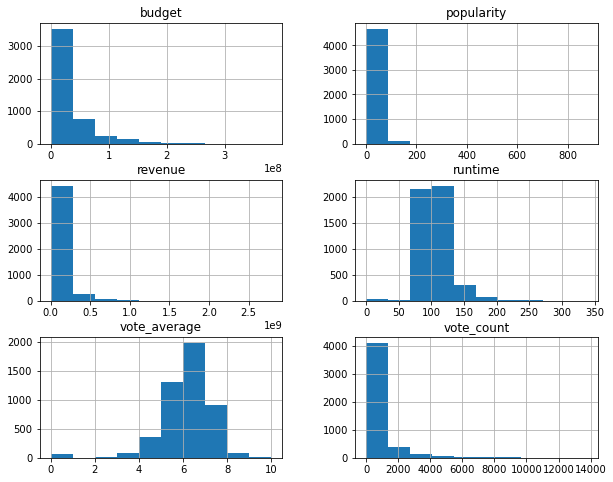

In [28]:
data.hist(figsize=(10,8));

## Checking Question 1 

here i want to compare the budget to revenue

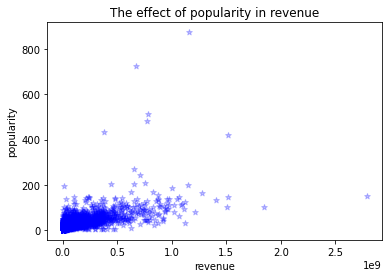

In [38]:
plt.scatter(data['revenue'],data['popularity'], color ='blue',marker='*',alpha=0.25)
plt.title('The effect of popularity in revenue')
plt.xlabel('revenue')
plt.ylabel('popularity');

here we found that the less the movie is populer the less it made porfit as you can see mont of the movies in the datasets has the same range of popularity and profit

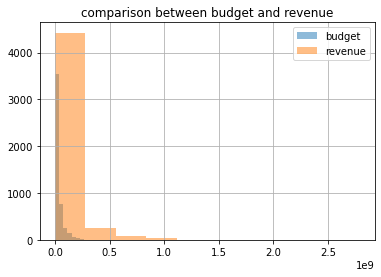

In [39]:
data.budget.hist(alpha=0.5, label='budget')
data.revenue.hist(alpha=0.5, label='revenue')
plt.title('comparison between budget and revenue')
plt.legend();

After checking this hisogram I found that most of the movies have agood profit in this data so we found that this movies made abig success and the more budget u put in the movie the more revenue you will get 

## Checking Question 2


checking the popularity to vote_counts 

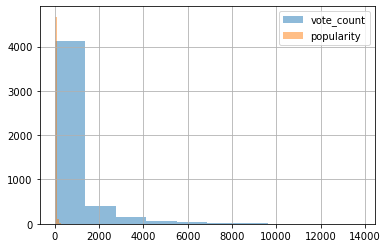

In [104]:
data.vote_count.hist(alpha=0.5, label='vote_count')
data.popularity.hist(alpha=0.5, label='popularity')
plt.legend();

After checking the histogram I found that this is not agood one because it can alot of people make votes and this movies is not that populer and give the movie a bad rate

## Checking Question 3

---------------------------------------------------------------------------------------------------------------------------
Checking the mean of the budget and revenue

In [102]:
data['budget'].mean()

29054015.10497813

In [103]:
data['revenue'].mean()

82294906.77858779

------------------------------------------------------------------------------------------------------------------------------
checking how many released movies , rumored and post production

In [105]:
data.status.value_counts()

Released           4793
Rumored               5
Post Production       3
Name: status, dtype: int64

#  Conclusions

For profit of the movies the more budget you put in making the movie the more revenue you get from the movie

the popularity does not effect the votes_avg that much there is abig gab in the scatter of them 

there is realation between budget and revenue and it is the more budget the movie has the more revenue it will get

the popularity also effect the revenue of the movie so the producthion companies should pay attention to make the movie more popular so it can make good renvenue

the popularity effect the revenue of the movie the more populer the movie the more revenue it has,and most of the movies in this data have popularity in the small range and the movies that have big popularity have huge revenue
__________________________________________________________________

## Limitations

The size of the two datasets is not that big, so it may cause overfit for any conclusion we take

Most of the movies are released so we can not use the status feature in our analysis and it has small movies number that rumored or post production

Not all the features in the two data sets can be used in the analysis only some of them are good to make good conclusions 

most of the movies make agood profit so we can not watch what result it will be when there is movies that did not make agood one